In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

In [2]:
with open('python_30.csv','rt') as node_in:
    node_in = csv.reader(node_in)
    every_edge = [row for row in node_in]

col0 = list(set([row[0] for row in every_edge]))
col1 = list(set([row[1] for row in every_edge]))

unique_nodes = list(set().union(col0, col1))

graph = nx.DiGraph()

graph.add_nodes_from(unique_nodes)

for edge in every_edge:
    graph.add_edge(*tuple(edge))

/Users/jared/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


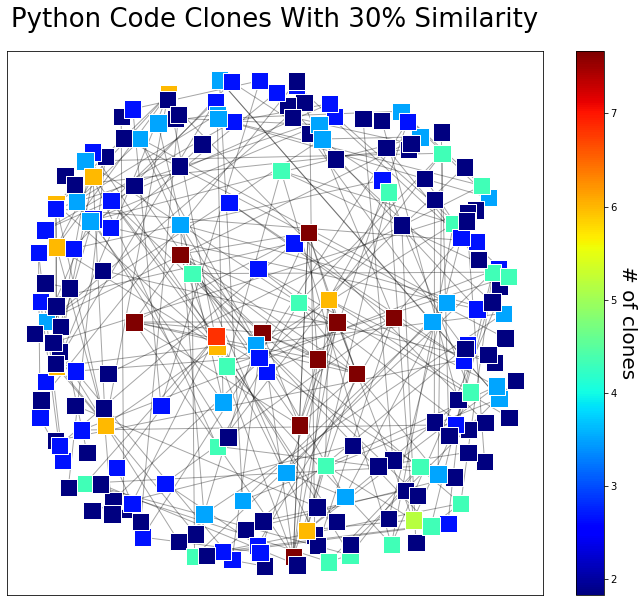

In [3]:
graph.degree(weight='weight')

largest = 0
for node in graph.nodes:
    if graph.degree(node) > largest:
        largest = graph.degree(node)
        
colors = []

for node in graph.nodes:
    colors.append(float(graph.degree(node) / largest))

pos = nx.spring_layout(graph, k=0.5, iterations=25)
plt.figure(3, figsize=(12,10)) 
ec = nx.draw_networkx_edges(graph, pos, alpha=0.35, arrows=False)
nc = nx.draw_networkx_nodes(graph, pos, nodelist=graph.nodes, node_color=colors, 
                            cmap=plt.cm.jet, edgecolors='white', node_shape=',')
#shapes = ["." , "," , "o" , "v" , "^" , "<", ">"]

cbar = plt.colorbar(nc)

tick_locator = ticker.MaxNLocator(nbins=largest-1)
cbar.locator = tick_locator
cbar.update_ticks()

labels = list(range(1, largest+1))

cbar.ax.set_yticklabels(labels)
cbar.set_label('# of clones', rotation=270, fontsize=20, labelpad=20)

plt.title('Python Code Clones With 30% Similarity', loc='center', fontsize=26, pad=24)
plt.show()

In [4]:
print(len(unique_nodes))

206


In [5]:
print(largest)

8
